<a href="https://colab.research.google.com/github/brit228/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-3-select-models-and-parameters/LS_DS_243_Select_models_and_parameters_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD
!wget https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1536k    0 1536k    0     0   933k      0 --:--:--  0:00:01 --:--:--  932k
--2019-01-31 15:51:31--  https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/BicycleWeather.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 234945 (229K) [text/plain]
Saving to: ‘BicycleWeather.csv.3’

BicycleWeather.csv. 100%[===================>] 229.44K  --.-KB/s    in 0.03s   

2019-01-31 15:51:31 (7.73 MB/s) - ‘BicycleWeather.csv.3’ saved [234945/234945]



In [66]:
import pandas as pd

counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True, 
                     infer_datetime_format=True)

weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True, 
                      infer_datetime_format=True)

daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]

weather_columns = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'AWND']
daily = daily.join(weather[weather_columns], how='inner')

cols = ['PRCP', 'SNOW', 'SNWD', 'AWND']
for c in cols:
  daily[daily[c] < 0.0] = 0.0

daily['Total_yesterday'] = daily.Total.shift(1)

daily = daily.drop(index=daily.index[0])


days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i, day in enumerate(days):
    daily[day] = (daily.index.dayofweek == i).astype(float)

for c in daily:
  print(daily[c].dtype, c)

float64 Total
float64 PRCP
float64 SNOW
float64 SNWD
float64 TMAX
float64 TMIN
float64 AWND
float64 Total_yesterday
float64 Mon
float64 Tue
float64 Wed
float64 Thu
float64 Fri
float64 Sat
float64 Sun


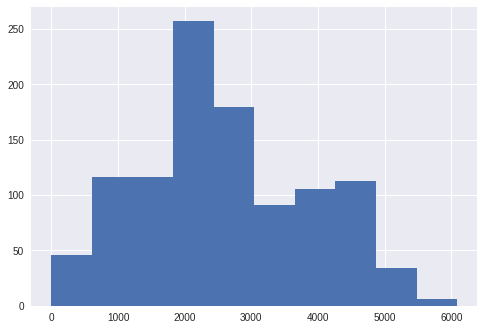

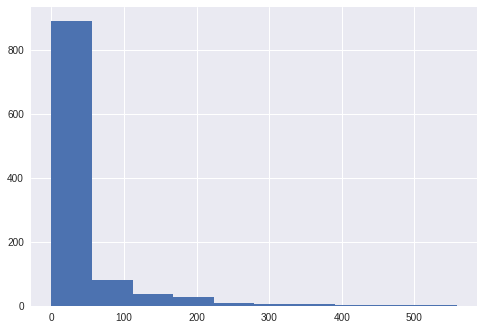

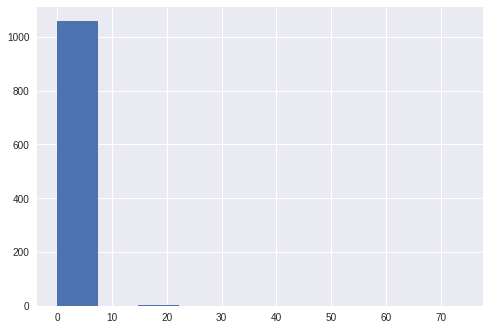

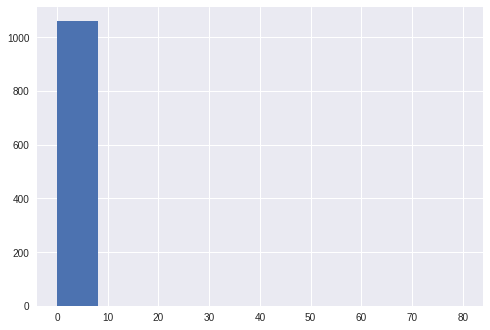

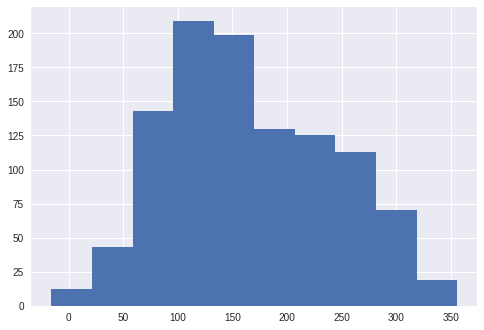

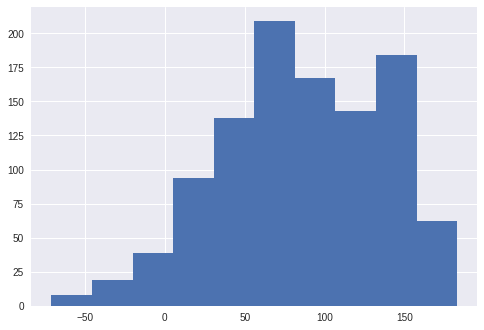

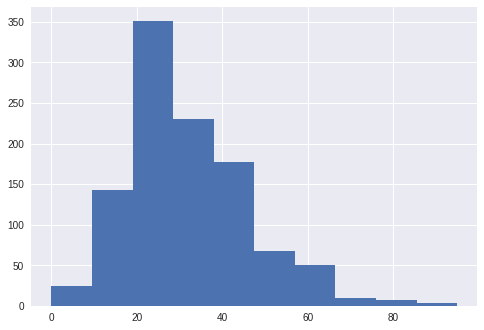

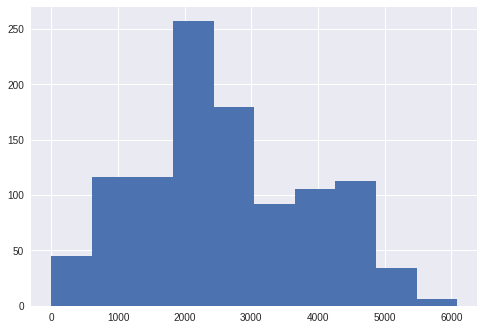

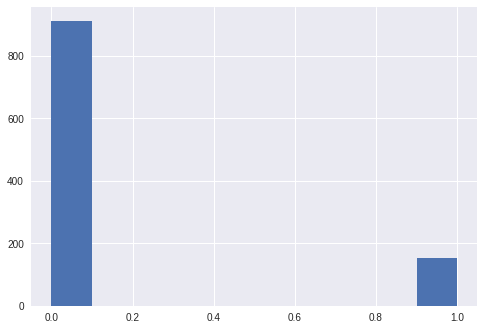

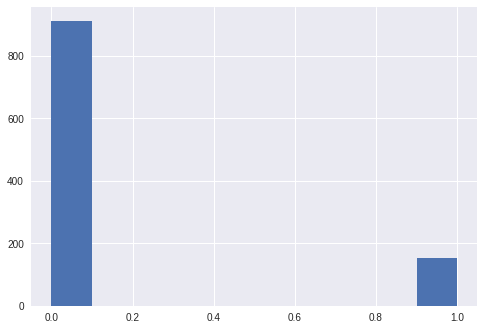

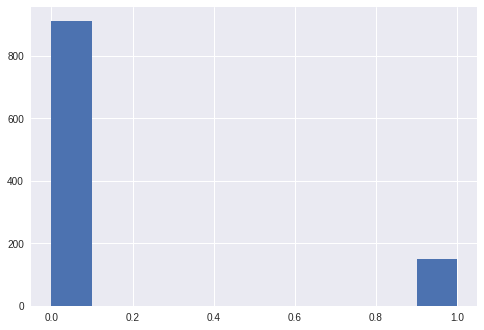

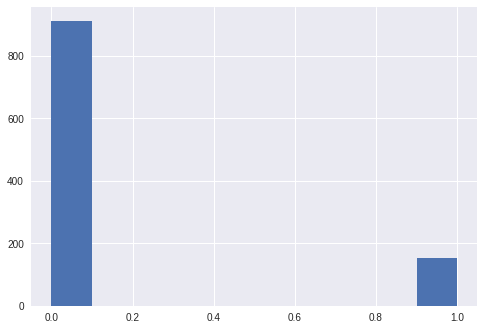

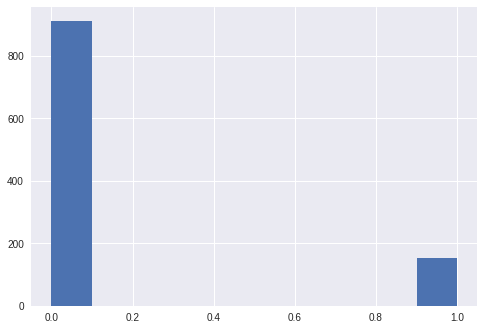

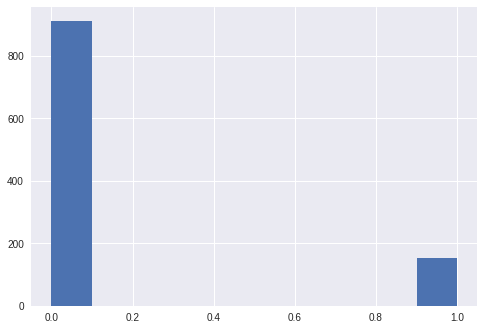

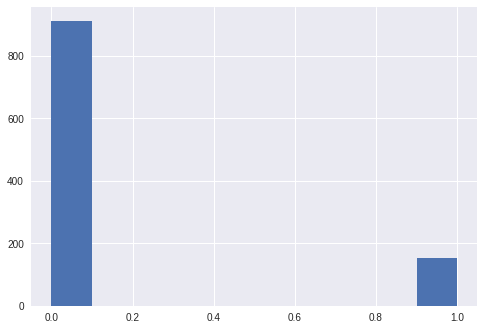

In [67]:
for c in daily:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.hist(daily[c])
  plt.show()

In [68]:
daily.describe()

,Total,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,Total_yesterday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,2620.612418,29.171214,0.128881,0.098777,166.189087,84.117592,31.606773,2623.924741,0.142992,0.142992,0.142051,0.142992,0.142992,0.142992,0.142992
std,1264.265491,65.796402,2.542917,2.570041,75.587062,51.167355,14.318138,1262.003543,0.350229,0.350229,0.349267,0.350229,0.350229,0.350229,0.350229
min,0.000000,0.000000,0.000000,0.000000,-16.000000,-71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1791.000000,0.000000,0.000000,0.000000,111.000000,44.000000,22.000000,1794.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2430.000000,0.000000,0.000000,0.000000,150.000000,83.000000,29.000000,2430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3574.500000,25.000000,0.000000,0.000000,222.000000,128.000000,39.500000,3574.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6088.000000,559.000000,74.000000,80.000000,356.000000,183.000000,95.000000,6088.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
y_col = "Total"

train = daily[:-100]
test = daily[-100:]

X_train = train.drop(columns=[y_col])
y_train = train[y_col]

X_test  = test.drop(columns=[y_col])
y_test  = test[y_col]

In [70]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

y_pred = np.full(shape=y_train.shape, fill_value=y_train.mean())

print(mean_absolute_error(y_train, y_pred))
print(mean_absolute_error(y_train, X_train.Total_yesterday))

986.9653827117361
721.5628245067497


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

print(mean_absolute_error(LinearRegression().fit(X_train, y_train).predict(X_test), y_test))
print(r2_score(LinearRegression().fit(X_train, y_train).predict(X_test), y_test))

418.2867205025995
0.6077378884164066


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:661: RuntimeWarning: inval

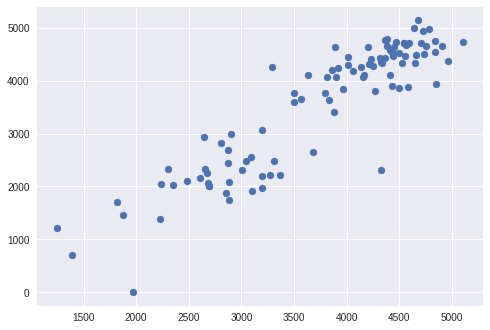

400.8440482623684 0.6172313678185277


In [72]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, KBinsDiscretizer
from sklearn.feature_selection import SelectFdr, f_regression
from sklearn.pipeline import Pipeline, FeatureUnion

class FeatureAdd(object):
  def __init__(self, list_funcs, drop=False):
    self.list_funcs = list_funcs
    self.drop = drop
    
  def transform(self, X):
    if self.drop:
      out = self.list_funcs[0].transform(X)
      for j in self.list_funcs[1:]:
        out = np.concatenate([out, j.transform(X)], axis=1)
    else:
      out = X.copy()
      for j in self.list_funcs:
        out = np.concatenate([out, j.transform(X)], axis=1)
    return out
  
  def fit(self, X, y=None):
    for j in self.list_funcs:
      j.fit(X,y)
    return self

def fit(l,x,y):
  nx = x.copy()
  for i in l[:-1]:
    nx = i.fit(nx,y).transform(nx)
  l[-1].fit(nx,y)

def predict(l,x):
  nx = x.copy()
  for i in l[:-1]:
    nx = i.transform(nx)
  return l[-1].predict(nx)

pipeline = Pipeline([("scale", StandardScaler()),
        ("f_add", FeatureUnion([("poly", PolynomialFeatures(degree=1)), ("bins", KBinsDiscretizer(encode='onehot-dense', n_bins=2, strategy='uniform'))])),
        ("select", SelectFdr(f_regression, alpha=0.05)),
        ("model", LinearRegression())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred, y_test)
plt.show()
print(mean_absolute_error(y_pred,y_test), r2_score(y_pred, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:661: RuntimeWarning: inval

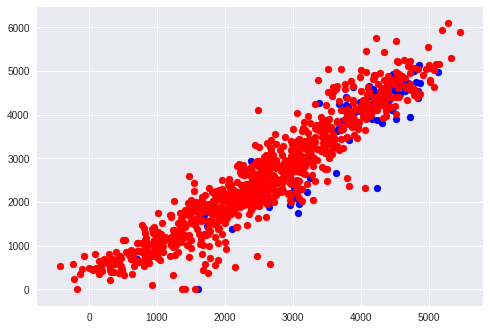

370.15 0.7050171609860357


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.covariance import EllipticEnvelope

outliers = EllipticEnvelope()
outliers.fit(X_train)
x_rem = [{1: True, -1: False}[i] for i in outliers.predict(X_train)]
X_train1 = X_train[x_rem]
y_train1 = y_train[x_rem]
x_rem = [not i for i in x_rem]
X_train2 = X_train[x_rem]
y_train2 = y_train[x_rem]

x_rem = [{1: True, -1: False}[i] for i in outliers.predict(X_test)]
X_test1 = X_test[x_rem]
y_test1 = y_test[x_rem]
x_rem = [not i for i in x_rem]
X_test2 = X_test[x_rem]
y_test2 = y_test[x_rem]

params = {"f_add__poly__degree": [0,1,2], "f_add__bins__n_bins": [2,3,4,5]}
pipe = Pipeline([("scale", StandardScaler()),
                ("f_add", FeatureUnion([("poly", PolynomialFeatures()), ("bins", KBinsDiscretizer(encode='onehot-dense', strategy='uniform'))])),
                ("select", SelectFdr(f_regression, alpha=0.05)),
                ("model", LinearRegression())])
pipeline1 = GridSearchCV(pipe, params, cv=5)
pipeline2 = GridSearchCV(pipe, params, cv=5)

pipeline1.fit(X_train, y_train)
# pipeline2.fit(X_train2, y_train2)
y_pred1 = pipeline1.predict(X_test)
# y_pred2 = pipeline2.predict(X_test2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred1, y_test, color="#0000ff")
ax.scatter(pipeline1.predict(X_train), y_train, color="#ff0000")
plt.show()

# print(len(y_train2), len(y_test2))

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(y_pred2, y_test2, color="#00ff00")
# ax.scatter(pipeline2.predict(X_train2), y_train2, color="#ffff00")
# plt.show()

print(mean_absolute_error(y_pred1,y_test), r2_score(y_pred1, y_test))
# print(mean_absolute_error(y_pred2,y_test2), r2_score(y_pred2, y_test2))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:661: RuntimeWarning: inval

{'mean_fit_time': array([0.01250753, 0.01067867, 0.01026258, 0.00996656, 0.0092247 ,
       0.0111412 , 0.02000299, 0.01025972, 0.0128931 , 0.01015506,
       0.02369452, 0.00987644, 0.02554526, 0.03055253, 0.02339258,
       0.02346296, 0.02763453, 0.02589746, 0.06017184, 0.06655221,
       0.05870085, 0.06366944, 0.05877542, 0.05688004, 0.01447868,
       0.01550951, 0.01305966, 0.01375313, 0.01464162, 0.01252236,
       0.03030162, 0.03087358, 0.03160896, 0.03137841, 0.02064958,
       0.02309451, 0.03989792, 0.02599616, 0.02656498, 0.02317624,
       0.02243829, 0.03908248, 0.06503401, 0.06001639, 0.06193419,
       0.06326213, 0.05909991, 0.05341635, 0.01957979, 0.013308  ,
       0.02107301, 0.01512208, 0.01902404, 0.01795216, 0.02382565,
       0.02002668, 0.01459694, 0.02508063, 0.02088761, 0.02067537,
       0.03879132, 0.04046774, 0.02541933, 0.02820773, 0.02570996,
       0.02139101, 0.06888123, 0.05847611, 0.05373044, 0.06542625,
       0.06425929, 0.06174564, 0.01583757, 0

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:661: RuntimeWarning: invalid value encountered in less_equal
  np.arange(1, n_features + 1)]
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:664: RuntimeWarning: invalid value encountered in less_equal
  return self.pvalues_ <= selected.max()


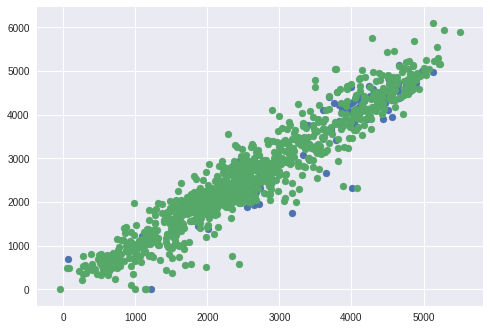

282.89536724955417 0.8510926886847092
275.0101176310291 0.8951845644024291


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:661: RuntimeWarning: invalid value encountered in less_equal
  np.arange(1, n_features + 1)]
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:664: RuntimeWarning: invalid value encountered in less_equal
  return self.pvalues_ <= selected.max()


In [84]:
from sklearn.linear_model import Ridge

n = 1
alphas = [np.power(10.0, i/n) for i in range(-5*n,5*n+1,2*n)]
params = {"f_add__poly__degree": [0,1,2,3], "f_add__bins__n_bins": [2,3,4,5], "model__alpha": alphas}
pipe = Pipeline([("scale", StandardScaler()),
                ("f_add", FeatureUnion([("poly", PolynomialFeatures(degree=1)), ("bins", KBinsDiscretizer(encode='onehot-dense', n_bins=2, strategy='uniform'))])),
                ("select", SelectFdr(f_regression, alpha=0.05)),
                ("model", Ridge())])
pipeline = GridSearchCV(pipe, params, cv=5)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(pipeline.cv_results_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred, y_test)
ax.scatter(pipeline.predict(X_train), y_train)
plt.show()
print(mean_absolute_error(y_pred,y_test), r2_score(y_pred, y_test))
y_pred = pipeline.predict(X_train)
print(mean_absolute_error(y_pred,y_train), r2_score(y_pred, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:661: RuntimeWarning: invalid value encountered in less_equal
  np.arange(1, n_features + 1)]
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:664: RuntimeWarning: invalid value encountered in less_equal
  return self.pvalues_ <= selected.max()


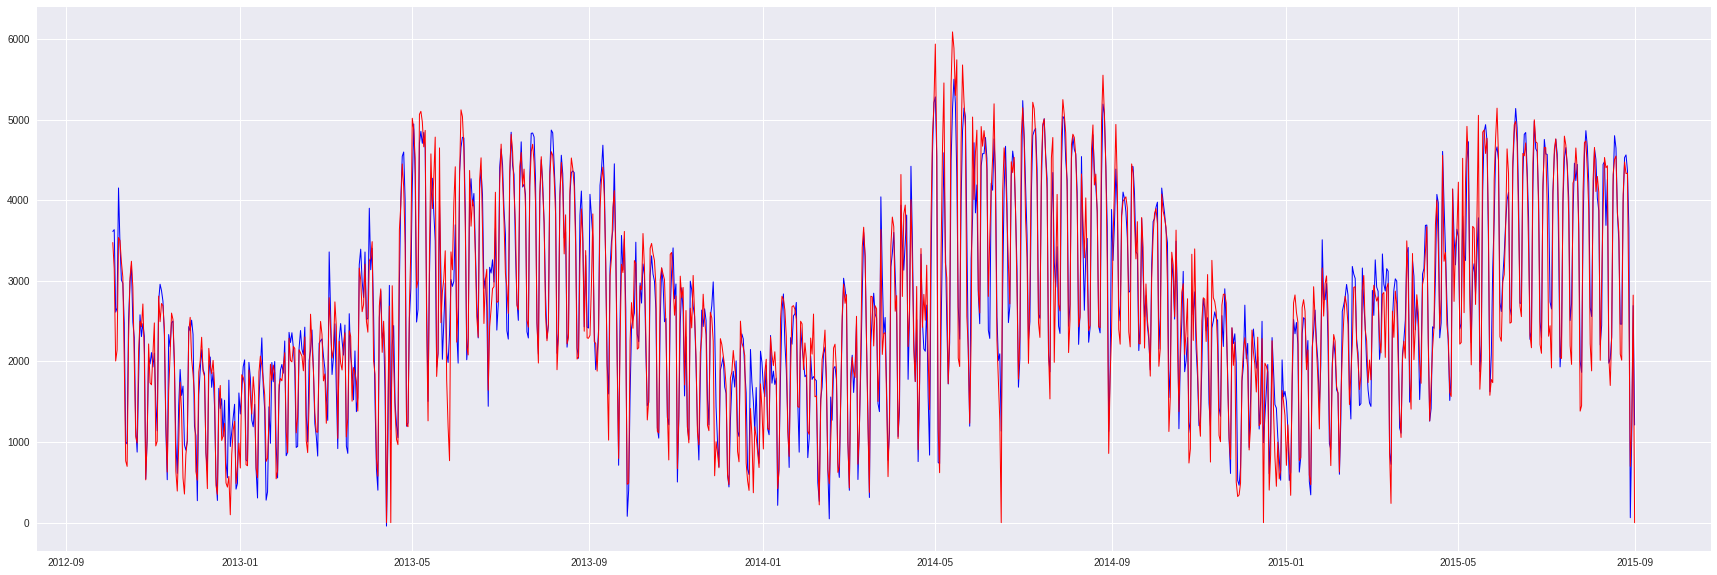

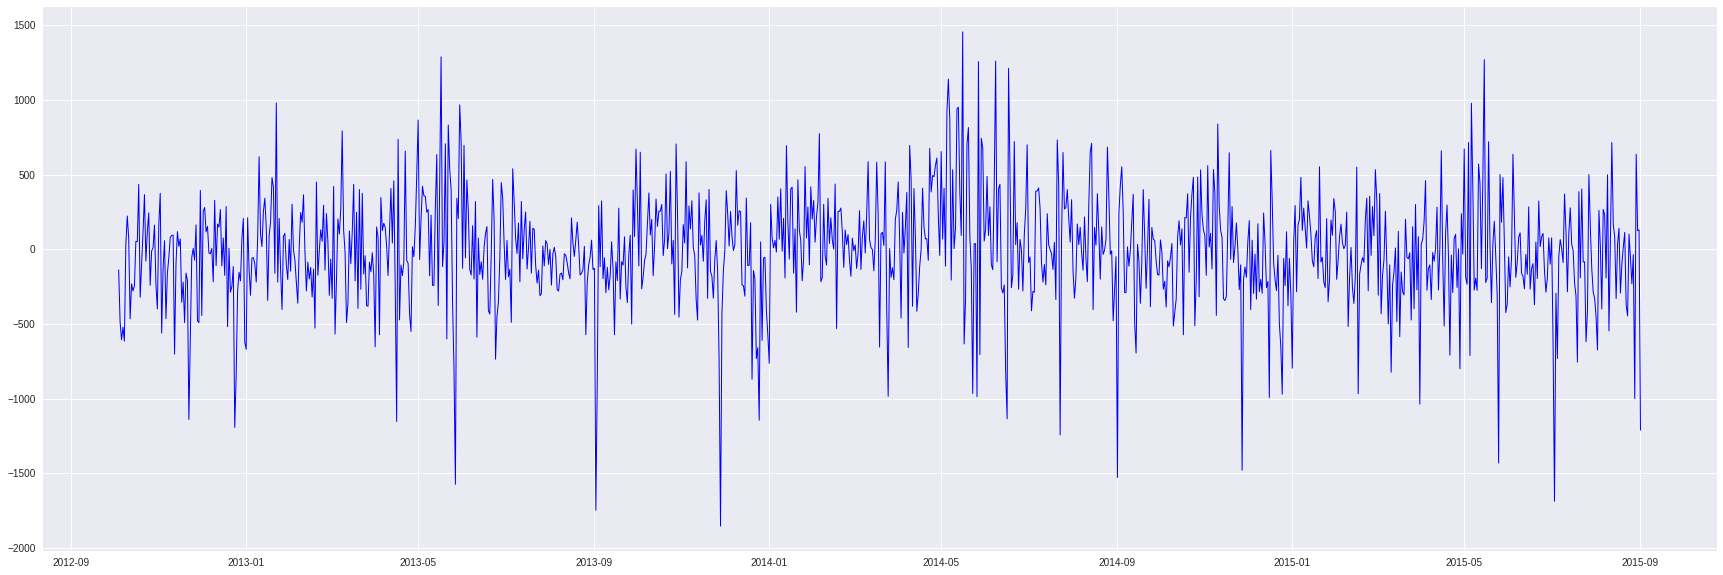

In [83]:
y_pred = pd.Series(pipeline.predict(daily.drop(columns=[y_col])), index=daily.index)
y_true = daily[y_col]

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(y_pred.index, y_pred, color="#0000ff", linewidth=1)
ax.plot(y_pred.index, y_true, color="#ff0000", linewidth=1)
plt.show()

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
ax.plot(y_pred.index, y_true - y_pred, color="#0000ff", linewidth=1)
plt.show()